# FFT Transformations, Discretization, and Representation by Russel Mendes

A Fourier transform decomposes a function of time into its constituent frequencies. This is useful in analyzing an audio file for its frequencies, the power of those frequencies, and the time of those frequencies. This details the process of Fourier Transform on each unit of the song. We can then represent the data from these transformations for an artistic rendering. This notebook will help show the underlying process. 

## Collecting Data
Since FFT are a long and computationally heavy task. It is often prudent to save the data.

#### Step 1) Load Dependencies and Song

In [4]:
"""
Author: Russel Mendes
"""
import numpy as np
from numpy import fft as fft
from scipy.io import wavfile
import pickle

pathToSong = 'CastleOfGlass.wav'
samplingFrequency, signalData = wavfile.read(pathToSong)
#samplingFrequency is the number of time the song has been sampled a second
#signalData is the data that holds the audio data of the song

channel1=signalData[:,0] #Some songs may have more than 1 channel

#### Step 2) PreProcessing

In [5]:
#Before the data of the song is sampled, we can premodify it depending our needs
#For Example, setting the dilationFactor to 100. The amount of data points will increase by a factor
#of 100. The REFRESH variable denotes how fast the data needs to replaced in seconds to match the 
#original speed of the song
#dilationFactor = 1 is a default per second analysis

dilationFactor = 100
n = int(samplingFrequency/dilationFactor)
REFRESH = 1/dilationFactor

extended = [channel1[i * n:(i + 1) * n] for i in range((len(channel1) + n - 1) // n )]  
print("Number of Data Sets in Data: " + str(len(extended)))
print("Number of Data Points in Set: " + str(len(extended[0])))
print("RefreshRate: " + str(REFRESH))
print("EstimatedTime: " + str((len(extended))/(1/REFRESH)))

Number of Data Sets in Data: 20551
Number of Data Points in Set: 441
RefreshRate: 0.01
EstimatedTime: 205.51


#### Step 3) Processing and Pickling Data

In [4]:
pickledFourier = []
#For every data set in the extended set. We are conducting a FFT, which we are storing for later 
#pickling
for data in extended:
    fourier=fft.fft(data) 
    pickledFourier.append(fourier)
    
name = 'CastleOfGlass_Of_%s_DataSsets_With_%s_DataPoints.p' % (len(extended),len(extended[0]))
pickle.dump(pickledFourier, open( name, "wb" ) )

## Plotting FFT


#### Step 1) Import and Load Relevant Dependencies

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle

infile = open("CastleOfGlass_Of_206_DataSsets_With_44100_DataPoints.p",'rb')
FFTrepo = pickle.load(infile)
infile.close()

#### Step 2) Plotting Continous FFT
For a given FFT in a the FFTrepo, this section will show how to plot continous FFT

C:\Users\Russel\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


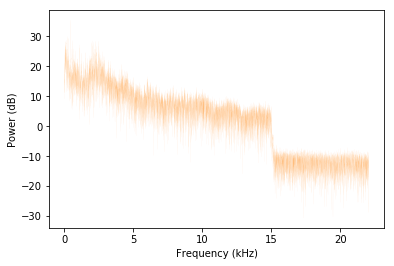

In [7]:
fourier = FFTrepo[200] #an arbitray data set
samplingFrequency = 44100 #sampling Frequency from the Earlier Secion
X = samplingFrequency

fourier = fourier[0:math.floor(X/2)] #Reducing Redundency in the Dataset
# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(X)
freqArray = np.arange(0, (X/2), 1.0) * (samplingFrequency*1.0/X)

#Modify The DataSets so it becomes readible
powerDB = 10*np.log10(fourier)
freqArray = freqArray/1000

#Plotting the data
plt.plot(freqArray, powerDB, color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
#Keep in mind. The data for each sound file is unique as compression plays a 
#factor in audio quality

#### Plotting Discrete FFT
Since FFT is often continous and many discrete data points. Sometimes, reducing the data into smaller chunks is advisable. In otherwise, making the data even more discrete. This section will use the same values from above

In [8]:
def ChunkAverage(ChunkyArray):
    """
    Take an array of with subelements of samples, and average them into a 
    discrete list.
    
    Params:
    ChunkyArray - an array with elements of arrays that contains data
    
    Returns:
    normArray - an average of all data elements ChunkyArray per element
    """
    num_Chunks = len(ChunkyArray)
    normArray = []
    for data in ChunkyArray:
        avgData = np.average(data)
        normArray.append(avgData)
    return normArray

C:\Users\Russel\Anaconda3\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


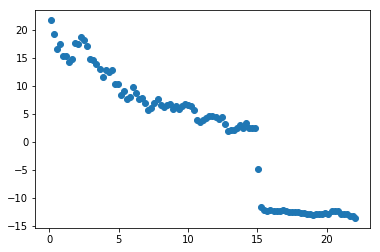

In [9]:
Partition = 100 #Reducing the data to 100 discrete data points
dataPerChunk = len(freqArray) / Partition #FreqArray and powerDB are the same size
n = int(dataPerChunk)

freqArrayChunks = [freqArray[i * n:(i + 1) * n] for i in range((len(freqArray) + n - 1) // n )]  
powerDBChunk = [powerDB[i * n:(i + 1) * n] for i in range((len(powerDB) + n - 1) // n )] 

normFreqChunks = ChunkAverage(freqArrayChunks)
normpowerDBChunk = ChunkAverage(powerDBChunk)

plt.scatter(normFreqChunks,normpowerDBChunk )

## Making a GIF representation of FFT
Since the data from each second of a FFT can be transcribed. Many manipulations can be done with this data. For this program, a gif will be made about the change in frequencies per unit of time. But any manipulation of data can be done.

#### Step 1) Import Dependencies

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pickle
from PIL import Image

infile = open("CastleOfGlass_Of_206_DataSsets_With_44100_DataPoints.p",'rb')
FFTrepo = pickle.load(infile)
infile.close()

#### Step 2) Load Helper Functions

In [11]:
#This helps load the data into a useable per chunk format
def createFreqArrayPowerDB(FFTrepo, index):
    """
    Take a FFT repository of data and access a specific element at the given
    index
    
    Params:
    FFTrepo - an array of FFT data
    index - an integer to access an element
    
    Returns:
    freqArray - an array of frequencies
    powerDB - an array of DB points corresponding to a frequency point
    
    """
    fourier = FFTrepo[index] #an arbitray data set
    samplingFrequency = 44100 #sampling Frequency from the Earlier Secion
    X = samplingFrequency

    fourier = fourier[0:math.floor(X/2)] #Reducing Redundency in the Dataset
    # scale by the number of points so that the magnitude does not depend on the length
    fourier = fourier / float(X)
    freqArray = np.arange(0, (X/2), 1.0) * (samplingFrequency*1.0/X)

    #Modify The DataSets so it becomes readible
    powerDB = 10*np.log10(fourier)
    freqArray = freqArray/1000
    
    return freqArray, powerDB

In [12]:
def ChunkAverage(ChunkyArray):
    """
    Take an array of with subelements of samples, and average them into a 
    discrete list.
    
    Params:
    ChunkyArray - an array with elements of arrays that contains data
    
    Returns:
    normArray - an average of all data elements ChunkyArray per element
    """
    normArray = []
    for data in ChunkyArray:
        avgData = np.average(data)
        normArray.append(avgData)
    return normArray

In [13]:
#This function creates an average array with x amount of partitions
def createNormFreqPower(freqArray, powerDB, Partition = 100):
    dataPerChunk = len(freqArray) / Partition #FreqArray and powerDB are the same size
    n = int(dataPerChunk)
    freqArrayChunks = [freqArray[i * n:(i + 1) * n] for i in range((len(freqArray) + n - 1) // n )]  
    powerDBChunk = [powerDB[i * n:(i + 1) * n] for i in range((len(powerDB) + n - 1) // n )] 
    normFreqChunks = ChunkAverage(freqArrayChunks)
    normPowerDBChunks = ChunkAverage(powerDBChunk)
    return normFreqChunks, normPowerDBChunks

In [14]:
def RaiseValue(array):
    """
    This function converts a complex array into simply a real array by removing
    the complex portion. It then takes the absolute value of the data
    
    Params:
    array - an array of data
    
    Returns:
    array - the arguement array but modified
    """
    for i in range(len(array)):    
        array[i] = np.abs(np.real(array[i]))
    return array

In [1]:
def give_RGB(row, col, powerDB, Adjust):
    """
    For a given pixel, adjustment factor, and DB value, return a RGB value 
    based on a formula
    
    Params:
    row - row of the pixel
    col - col of the pixel
    powerDB - an array of discrete DB values
    Adjust - a scalar that adjusts the maximum height for the image
    
    Returns:
    R - an integer between 0-255
    G - an integer between 0-255
    B - an integer between 0-255 
    """
 
    R = 0
    G = 0
    B = 0
    
    if col <= len(powerDB): #Check if the col is valid under the powerDB array
        try:
            maxHeight = powerDB[col]
            pixelHeight = maxHeight * Adjust
            if(row < pixelHeight):
                R = math.sin(row * col*3.14) * 255
                G = 0
                B = 0
        except:
            spacer = ""
         #   print(col)
        
    return (int(R),int(G),int(B))

In [34]:
def createFrames(raisedFreqChunks, raisedPowerDBChunks, XDIM = 100, YDIM = 100, floor = False):
    """
    This function takes an array of frequency and it corresponding power and few 
    other parameters and creates an image.
    
    Params:
    raisedFreqChunks - an array of discrete frequencies
    raisedPowerChunks - an array of corresponding DB
    XDIM - x dimension of the image
    YDIM - y dimension of the image
    floor - flooring the image DEPRACTED
    
    Returns:
    new_image = a PIL image 
    """
    
    DATAPOINTS = len(raisedFreqChunks)
    THICKNESS = int(np.round(XDIM/DATAPOINTS))

    img_array = []
    img_array = np.empty((YDIM,XDIM,3), dtype=np.uint8)
    for row in range(YDIM):
        for col in range(XDIM):
            if floor:
                Width = math.floor(col/THICKNESS)
            else:
                Width = int(col/THICKNESS)
            img_array[row][col] = give_RGB(row, Width, raisedPowerDBChunks, 3)
    new_image = Image.fromarray(img_array)
    new_image = new_image.rotate(180)
    new_image = new_image.transpose(Image.FLIP_LEFT_RIGHT)
    return new_image

In [3]:
def createGIF(pickleFile, showStep = False):
    """
    Creates a GIF based on a pickleFile that contains FFT information of a song
    Saves the GIF locally to the file location of this project
    
    Params:
    pickleFile - a pickle file with FFT information
    showStep - true/false on whether to show the progress of the gif creation
    
    """
    splitName = pickleFile.split('_')
    frames = []
    infile = open(pickleFile,'rb')
    FFTrepo = pickle.load(infile)
    infile.close()
    for i in range(len(FFTrepo)):
        if showStep:
            print("STEP: " + str(i))
        freqArray, powerDB = createFreqArrayPowerDB(FFTrepo, i)
        normFreqChunks, normPowerDBChunks = createNormFreqPower(freqArray, powerDB, 150)
        raisedFreqChunks = RaiseValue(normFreqChunks)
        raisedPowerDBChunks = RaiseValue(normPowerDBChunks)
        frames.append(createFrames(raisedFreqChunks, raisedPowerDBChunks, XDIM = 500, floor = True))
    name = splitName[0]+".gif"
    frames[0].save(name, format='GIF', append_images=frames[1:], save_all=True, duration=205, loop=0)

        

In [ ]:
pickleFile = "CastleOfGlass_Of_206_DataSsets_With_44100_DataPoints.p"
createGIF(pickleFile)